# PIA
### Aaron Arath Alvarado Anzaldua 1951187
### Jorge Axel Espronceda Rodríguez 1965626
### Jose Angel Salazar Willars 1913413
### Andrick Uriel Rosales Rodríguez 1953017
### Raymundo Bautista Reyes 2082326
### N1 5:00
### Grupo 007

# DESCARGAR E IMPROTAR LIBRERIAS

In [ ]:
!pip install kaggle
!pip install tensorflow
!pip install matplotlib

In [ ]:
from google.colab import files
files.upload()

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d balraj98/edges2shoes-dataset
!unzip edges2shoes-dataset.zip

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image


# PREPROCESAMIENTO



In [ ]:
dataset_path = '/content/train'
image_size = (512, 256)
num_images = 100

def load_images(dataset_path, image_size, num_images):
    images = []
    filenames = sorted(os.listdir(dataset_path))[:num_images]
    for filename in filenames:
        image = Image.open(os.path.join(dataset_path, filename)).resize(image_size)
        images.append(np.array(image))
    return np.array(images)

images = load_images(dataset_path, image_size, num_images)
images = images / 255.0

### Clases:
*   Clase 0: Representa la primera mitad de imagenes en el conjunto de datos.
*   Clase 1: Representa la última mitad de imágenes en el conjunto de datos

### Etiquetas:
*   Las primeras 50 imágenes (de un total de 100) están etiquetadas como 0.
*   Las últimas 50 imágenes están etiquetadas como 1.

Como num_images es 100:

(num_images // 2) es 50 (entero de la división).
Por lo tanto, las primeras 50 imágenes tienen etiquetas 0 y las últimas 50 imágenes tienen etiquetas 1.

In [ ]:
labels = np.array([0] * (num_images // 2) + [1] * (num_images - num_images // 2))

In [ ]:
split_index = int(0.8 * num_images)
train_images, val_images = images[:split_index], images[split_index:]
train_labels, val_labels = labels[:split_index], labels[split_index:]

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(256, 512, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(2, activation='softmax')
])

model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# ENTRENAMIENTO

In [ ]:
history = model.fit(train_images, train_labels, epochs=10, validation_data=(val_images, val_labels))

Epoch 1/10
3/3 [==============================] - 34s 12s/step - loss: 11.0234 - accuracy: 0.5250 - val_loss: 3.2008e-06 - val_accuracy: 1.0000
Epoch 2/10
3/3 [==============================] - 38s 14s/step - loss: 4.7644 - accuracy: 0.3750 - val_loss: 1.4414 - val_accuracy: 0.0000e+00
Epoch 3/10
3/3 [==============================] - 33s 9s/step - loss: 0.6588 - accuracy: 0.6250 - val_loss: 1.2806 - val_accuracy: 0.0000e+00
Epoch 4/10
3/3 [==============================] - 32s 8s/step - loss: 0.5985 - accuracy: 0.7500 - val_loss: 1.9058 - val_accuracy: 0.0000e+00
Epoch 5/10
3/3 [==============================] - 32s 8s/step - loss: 0.5265 - accuracy: 0.6875 - val_loss: 0.5998 - val_accuracy: 0.8000
Epoch 6/10
3/3 [==============================] - 35s 9s/step - loss: 0.4446 - accuracy: 0.7750 - val_loss: 0.7249 - val_accuracy: 0.5000
Epoch 7/10
3/3 [==============================] - 34s 10s/step - loss: 0.2851 - accuracy: 0.8875 - val_loss: 1.9817 - val_accuracy: 0.0500
Epoch 8/10
3/3

# PREDICCIONES

1/1 [==============================] - 1s 506ms/step


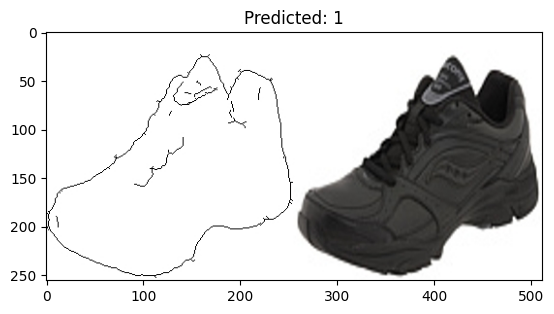

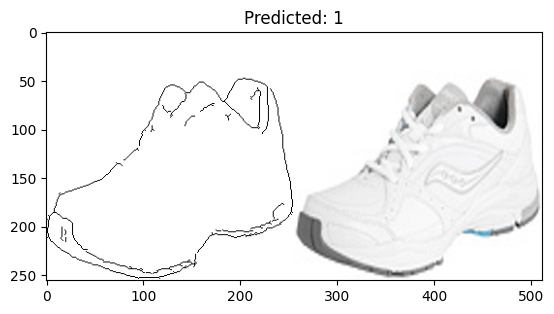

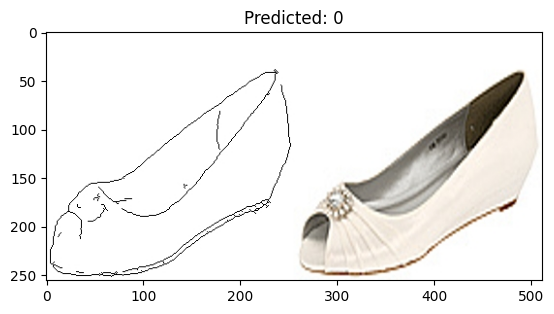

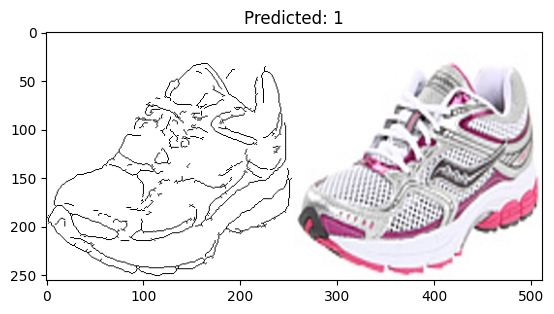

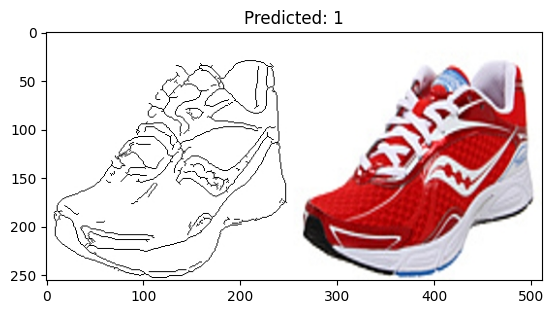

In [ ]:
predictions = model.predict(val_images[:5])
for i, prediction in enumerate(predictions):
    plt.figure()
    plt.imshow(val_images[i])
    plt.title(f'Predicted: {np.argmax(prediction)}')
    plt.show()

# GRÁFICO DE PRECISIÓN DE ENTRENAMIENTO VS. PRECISIÓN DE VALIDACIÓN

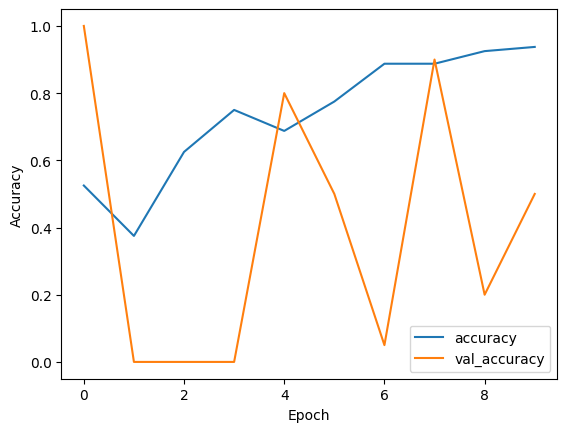

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()